In [1]:
# Importaciones clasicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas profiling para EDA
from ydata_profiling import ProfileReport
import ipywidgets

#Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

#Importancion de Geopandas
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import plugins

# Visualizacion de datos perdidos o NaN
import missingno as msngo

In [2]:
sample = pd.read_csv('datasets/sample_submission.csv')
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

In [3]:
sample.head(5)

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00     81.94
1  ID_-0.510_29.290_2022_01     81.94
2  ID_-0.510_29.290_2022_02     81.94
3  ID_-0.510_29.290_2022_03     81.94
4  ID_-0.510_29.290_2022_04     81.94

In [4]:
test.head(5)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                            NaN                                  NaN  ...   
1                       0.000000                            76.239196  ...   
2                       0.079870                           -42.055341  ...   
3                       0.201028                            72.169566  ...   
4                       0.204352                            76.190865  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              36022.027344             8472.313477   
1              48539.737242             6476.147323   
2              34133.080469             8984.795703   
3              50854.991076             6014.724059   
4              46594.685145             6849.280477   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.708579              5476.147161   
2               39006.093750              7984.795703   
3               57646.368368              5014.724115   
4               52896.541873              5849.280394   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448437              0.293119   
2                  10.753179              0.267130   
3                  11.764556              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -133.047546                 33.779583  
1                -138.632822                 31.012380  
2                -144.784988                 26.743361  
3                -135.027891                 29.604774  
4                -135.500119                 26.276807  

[5 rows x 75 columns]

In [5]:
train.head(5)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [6]:
# Revisamos la cantidad de columnas y filas del registros de los datasets
sample.shape, train.shape, test.shape

((24353, 2), (79023, 76), (24353, 75))

In [7]:
# Revisamos el tipo de datos del dataset de validación
sample.dtypes

ID_LAT_LON_YEAR_WEEK     object
emission                float64
dtype: object

In [8]:
# Revisamos el tipo de datos del dataset de entrenamiento
train.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object

<Axes: >

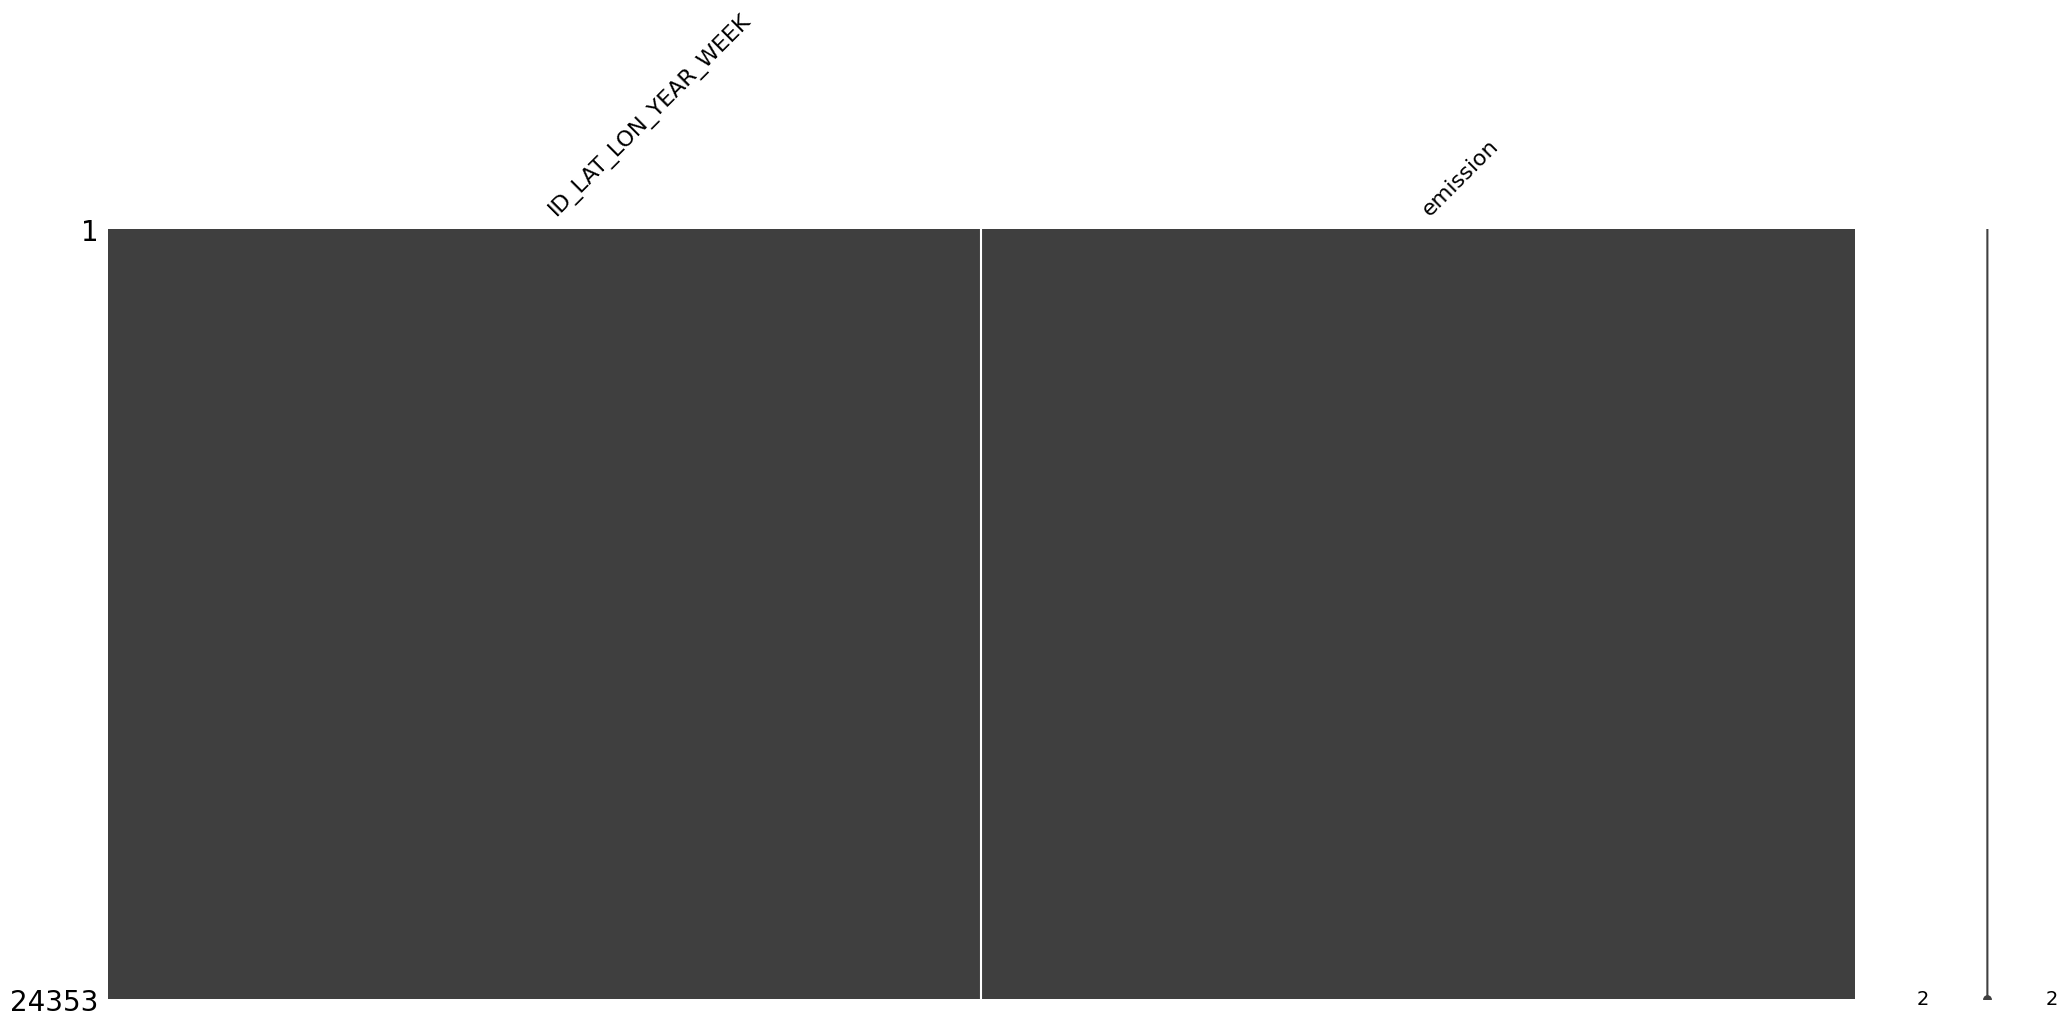

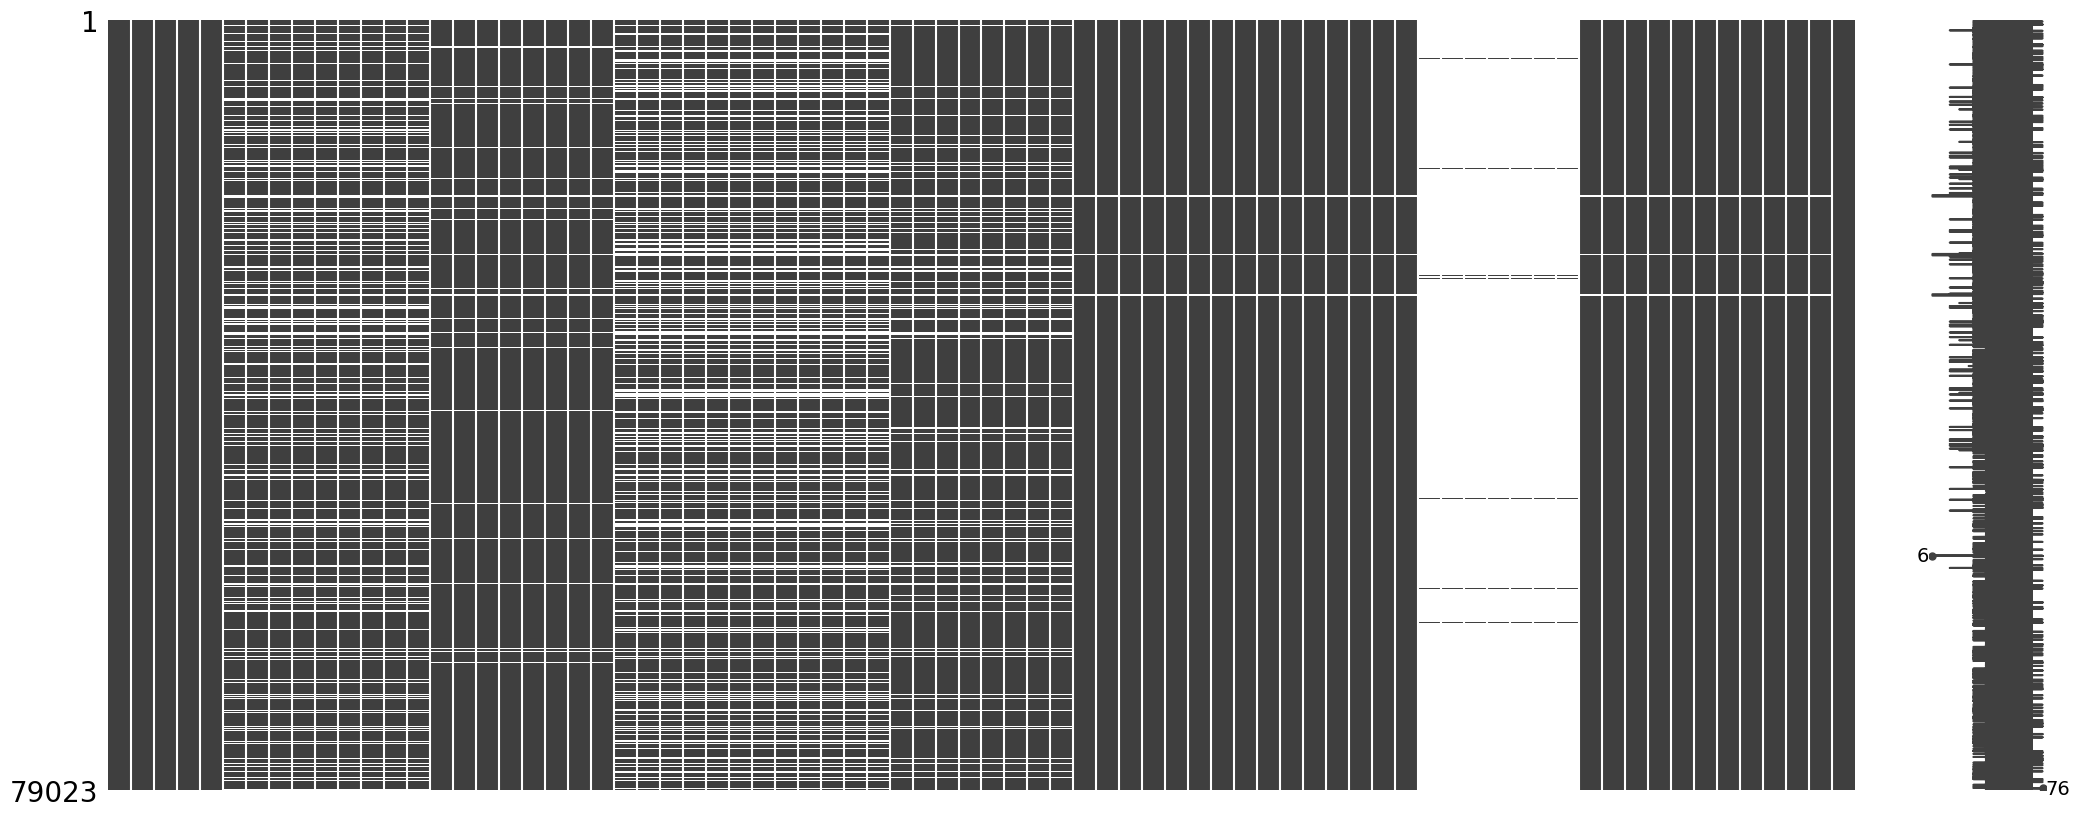

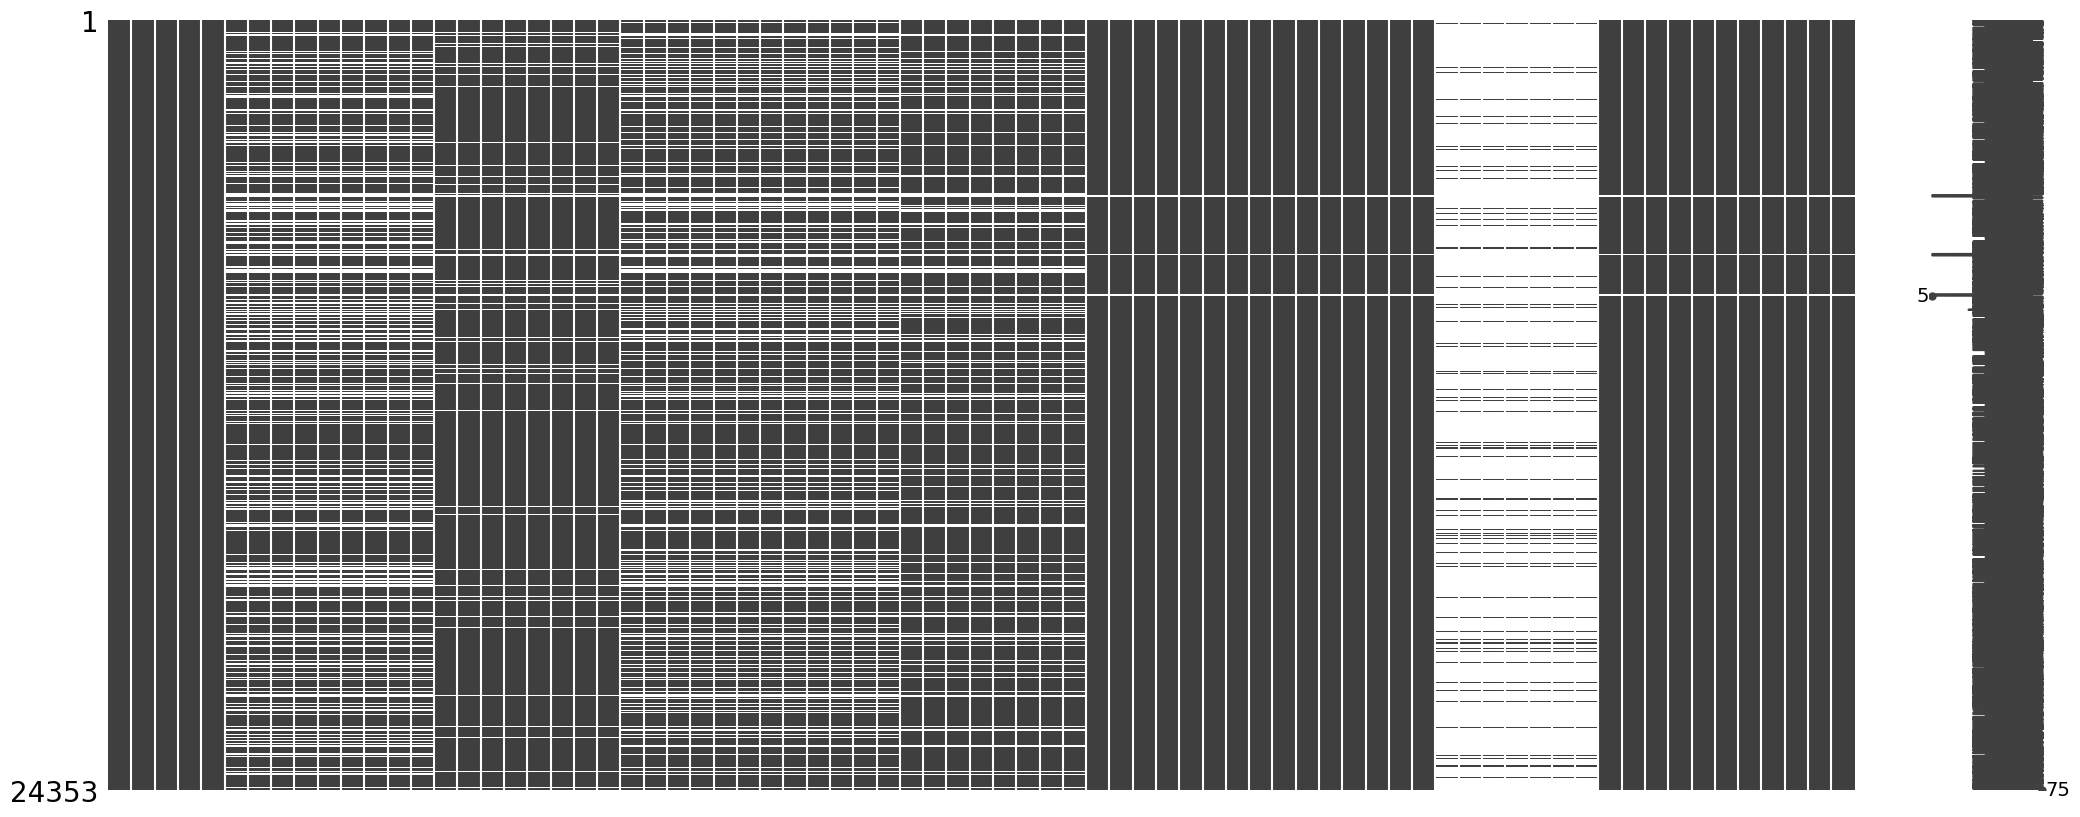

In [9]:
# Matriz grafica de datos nulos
msngo.matrix(sample)
msngo.matrix(train)
msngo.matrix(test)

In [10]:
profile = ProfileReport(train, title="Profiling Report", minimal = True)

In [11]:
#profile.to_file("report.html")
#profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      79023  79023.000000  79023.000000  79023.000000   
unique                     79023           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.891072     29.880155   2020.000000   
std                          NaN      0.694522      0.810375      0.816502   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.451000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.883000   2020.000000   
75%                          NaN     -1.303000     30.471000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   79023.000000                              64414.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.000000                                  0.000048   
std        15.297155                                  0.000272   
min         0.000000                                 -0.000996   
25%        13.000000                                 -0.000096   
50%        26.000000                                  0.000024   
75%        39.000000                                  0.000153   
max        52.000000                                  0.004191   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   64414.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.834848   
std                                         0.185382   
min                                         0.241822   
25%                                         0.705817   
50%                                         0.809118   
75%                                         0.942792   
max                                         1.885239   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     64414.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000035   
std                                           0.000206   
min                                          -0.000887   
25%                                          -0.000078   
50%                                           0.000019   
75%                                           0.000121   
max                                           0.004236   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    64414.000000                         64414.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.158418                            -7.925870   
std                          0.071364                            64.263368   
min                          0.000000                          -179.537059   
25%                          0.110535                           -56.782383   
50%                          0.161855                           -12.441726   
75%                          0.211824                            72.059990   
max                          0.299998                 

In [13]:
#train.fillna(0) 

<Axes: xlabel='emission', ylabel='Count'>

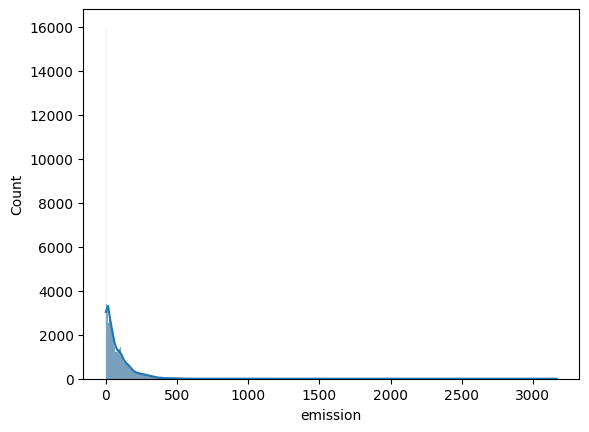

In [14]:
sns.histplot(data = train, x = 'emission', kde = 'True')

In [15]:
# Combine el entrenamiento y la prueba para una fácil visualización
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(all_data[["latitude", "longitude", "set_type"]], geometry = geometry)

# Preview the geopandas df
geo_df.head()

C:\Users\madne\AppData\Local\Temp\ipykernel_17816\493630914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'
C:\Users\madne\AppData\Local\Temp\ipykernel_17816\493630914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'


latitude  longitude set_type                   geometry
0    -0.510     29.290    train  POINT (29.29000 -0.51000)
1    -0.528     29.472    train  POINT (29.47200 -0.52800)
2    -0.547     29.653    train  POINT (29.65300 -0.54700)
3    -0.569     30.031    train  POINT (30.03100 -0.56900)
4    -0.598     29.102    train  POINT (29.10200 -0.59800)

> ### Mapa de las emisiones de CO2 con los datos sin tratar

In [16]:
map = folium.Map(location=[-2, 30], tiles = "OpenStreetMap", zoom_start = 8)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data

plugins.HeatMap(heat_data).add_to(map)

map

>#### Heatmap con todas las variables y sus datos nulos, se debe encontrar una buena estrategia para tratar los datos nulos, puesto que no se van a poder eliminar ni poner en cero ya que son demasiados

<Axes: >

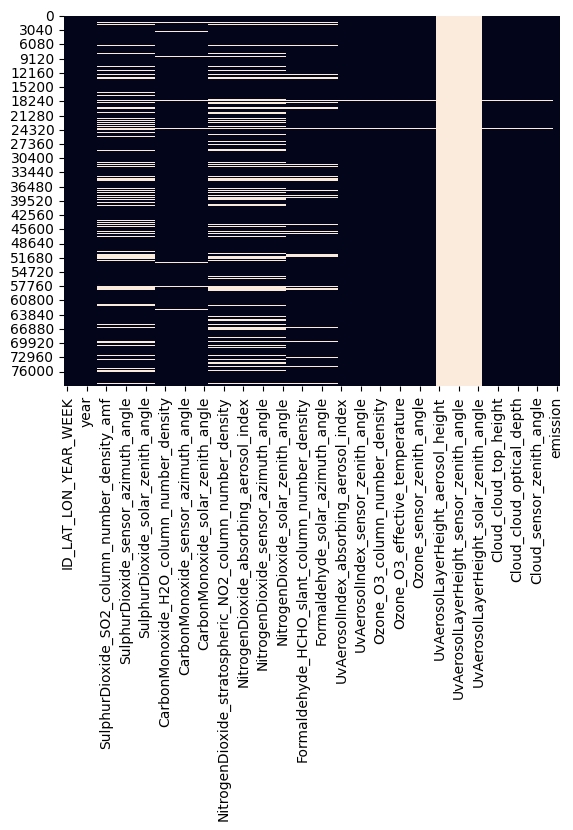

In [17]:
sns.heatmap(train.isnull(), cbar=False)

>#### Probaremos trasnformar los datos nulos por la media de cada variable para no perder registros en el dataset.

In [18]:
train_clean = train

In [19]:
for columna in train_clean.columns:
    if train_clean[columna].dtype == 'float64':
        media = train_clean[columna].mean()
        train_clean[columna].fillna(media, inplace=True)

train_clean.sample(7, random_state = 15)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
8367   ID_-0.989_30.411_2020_46    -0.989     30.411  2020       46   
6132   ID_-0.933_29.267_2020_37    -0.933     29.267  2020       37   
72773  ID_-2.896_29.404_2021_04    -2.896     29.404  2021        4   
48858  ID_-2.154_29.946_2019_45    -2.154     29.946  2019       45   
60198  ID_-2.496_28.504_2020_43    -2.496     28.504  2020       43   
52131  ID_-2.257_30.243_2021_32    -2.257     30.243  2021       32   
43761  ID_-1.990_30.410_2019_36    -1.990     30.410  2019       36   

       SulphurDioxide_SO2_column_number_density  \
8367                              -1.087396e-04   
6132                               5.291108e-05   
72773                              4.788210e-05   
48858                              7.344137e-05   
60198                              4.788210e-05   
52131                             -7.573212e-05   
43761                             -3.366840e-08   

       SulphurDioxide_SO2_column_number_density_amf  \
8367                                       1.507077   
6132                                       0.827439   
72773                                      0.834848   
48858                                      0.759307   
60198                                      0.834848   
52131                                      0.492771   
43761                                      0.830706   

       SulphurDioxide_SO2_slant_column_number_density  \
8367                                        -0.000164   
6132                                         0.000031   
72773                                        0.000035   
48858                                        0.000042   
60198                                        0.000035   
52131                                       -0.000044   
43761                                       -0.000003   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
8367                        0.210923                          -101.015320   
6132                        0.191784                           -40.955288   
72773                       0.158418                            -7.925870   
48858                       0.076549                           -41.412922   
60198                       0.158418                            -7.925870   
52131                       0.227893                           -15.245106   
43761                       0.209502                            74.603378   

       ...  Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
8367   ...             6250.573193               57203.475000   
6132   ...             4377.209770               67600.780645   
72773  ...             4408.223390               68948.721724   
48858  ...             7989.372381               44392.280391   
60198  ...             6843.369538               51287.824765   
52131  ...             4815.743603               64758.067977   
43761  ...             5790.162843               58755.972052   

       Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
8367               5340.984717                  36.950714   
6132               3545.785018                   6.399122   
72773              3463.480255                  14.357064   
48858              6989.372284                  14.876519   
60198              5843.369691                  79.164292   
52131              3829.954366                  15.412659   
43761              4790.162871                  19.656273   

       Cloud_surface_albedo  Cloud_sensor_azimuth_angle  \
8367               0.315388                    4.920210   
6132               0.287616                  -12.047741   
72773              0.303625                  -25.696351   
48858              0.308844                    6.959618   
60198              0.314655                  -12.542380   
52131              0.227099                  -25.534137   
43761              0.217563                   16.295569   

       Cloud_sensor_zenith_angle  C

In [20]:
columnas_notacion_cientifica = ['SulphurDioxide_SO2_column_number_density']

# Función para convertir una cadena en notación científica a un número de punto flotante
def convertir_notacion_cientifica_a_float(cadena):
    try:
        numero = float(cadena)
        return numero
    except ValueError:
        return cadena

# Aplica la función de conversión a las columnas en notación científica
for columna in columnas_notacion_cientifica:
    train_clean[columna] = train_clean[columna].apply(convertir_notacion_cientifica_a_float)



In [21]:
train_clean['SulphurDioxide_SO2_column_number_density'].describe(include='all')

count    79023.000000
mean         0.000048
std          0.000246
min         -0.000996
25%         -0.000065
50%          0.000048
75%          0.000117
max          0.004191
Name: SulphurDioxide_SO2_column_number_density, dtype: float64

In [22]:
train_clean.head(7)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   
5  ID_-0.510_29.290_2019_05     -0.51      29.29  2019        5   
6  ID_-0.510_29.290_2019_06     -0.51      29.29  2019        6   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                  0.000048   
4                                 -0.000079   
5                                  0.000294   
6                                 -0.000285   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                      0.834848   
4                                      0.676296   
5                                      0.871713   
6                                      0.791956   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                        0.000035   
4                                       -0.000048   
5                                        0.000242   
6                                       -0.000226   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                       0.158418                            -7.925870  ...   
4                       0.121164                             4.121269  ...   
5                       0.227656                           -13.453690  ...   
6                       0.119397                            72.198647  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   
5             5530.354546               49846.001010              4495.301362   
6             4378.614648               58804.276563              3537.050659   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   
5                   7.556143              0.250228   
6                  10.493107              0.240828   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   
5                   30.128401                  37.007020   
6                    4.585368                  30.491541   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0   

<Axes: >

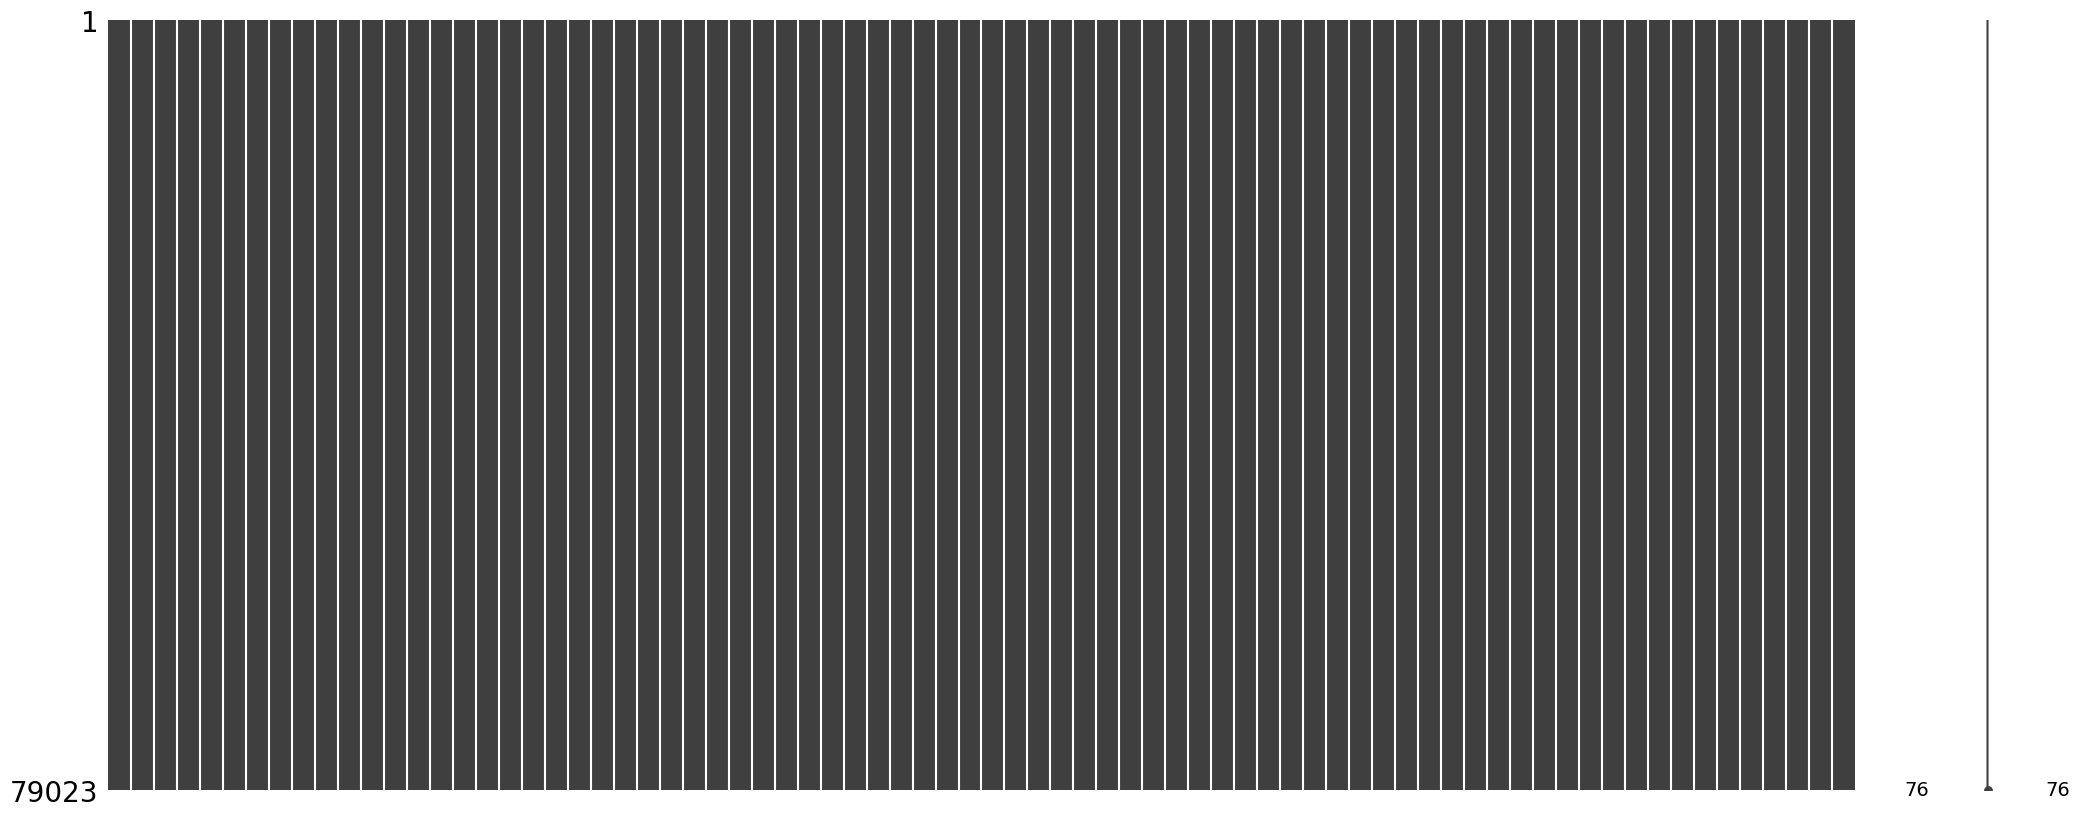

In [23]:
msngo.matrix(train_clean)

In [24]:
train_clean.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      79023  79023.000000  79023.000000  79023.000000   
unique                     79023           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.891072     29.880155   2020.000000   
std                          NaN      0.694522      0.810375      0.816502   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.451000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.883000   2020.000000   
75%                          NaN     -1.303000     30.471000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   79023.000000                              79023.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.000000                                  0.000048   
std        15.297155                                  0.000246   
min         0.000000                                 -0.000996   
25%        13.000000                                 -0.000065   
50%        26.000000                                  0.000048   
75%        39.000000                                  0.000117   
max        52.000000                                  0.004191   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   79023.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.834848   
std                                         0.167371   
min                                         0.241822   
25%                                         0.730940   
50%                                         0.834848   
75%                                         0.905362   
max                                         1.885239   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     79023.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000035   
std                                           0.000186   
min                                          -0.000887   
25%                                          -0.000053   
50%                                           0.000035   
75%                                           0.000093   
max                                           0.004236   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    79023.000000                         79023.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.158418                            -7.925870   
std                          0.064430                            58.019802   
min                          0.000000                          -179.537059   
25%                          0.123332                           -41.806629   
50%                          0.158418                            -7.925870   
75%                          0.199492                            30.969258   
max                          0.299998                 

In [25]:
df_regresion = train_clean
df_regresion.drop(columns='ID_LAT_LON_YEAR_WEEK', inplace = True)

In [26]:
df_regresion.sample(7)

latitude  longitude  year  week_no  \
11189    -1.068     31.332  2020        6   
22454    -1.364     29.036  2019       35   
72035    -2.859     29.441  2019        8   
36064    -1.804     31.196  2021       24   
47707    -2.119     29.281  2019        7   
76562    -3.023     30.177  2020       30   
3196     -0.793     30.607  2019       16   

       SulphurDioxide_SO2_column_number_density  \
11189                                  0.000231   
22454                                 -0.000216   
72035                                 -0.000200   
36064                                 -0.000502   
47707                                  0.000159   
76562                                 -0.000024   
3196                                  -0.000105   

       SulphurDioxide_SO2_column_number_density_amf  \
11189                                      0.726938   
22454                                      0.954378   
72035                                      0.674107   
36064                                      0.643238   
47707                                      0.684276   
76562                                      1.253566   
3196                                       0.642576   

       SulphurDioxide_SO2_slant_column_number_density  \
11189                                        0.000173   
22454                                       -0.000145   
72035                                       -0.000122   
36064                                       -0.000308   
47707                                        0.000109   
76562                                       -0.000033   
3196                                        -0.000072   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
11189                       0.064921                            49.443330   
22454                       0.193053                           -12.575710   
72035                       0.115609                            15.333484   
36064                       0.116041                          -101.083034   
47707                       0.150077                            73.609818   
76562                       0.168512                           -99.365908   
3196                        0.041938                            73.577746   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
11189                           27.056690  ...             6135.136934   
22454                           36.499336  ...             5702.706730   
72035                           45.291870  ...             7249.670249   
36064                           23.053880  ...             5355.678138   
47707                           46.283123  ...             6422.582733   
76562                           45.337183  ...             3567.961363   
3196                            44.695028  ...             5927.664062   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
11189               55649.552983              5135.137000   
22454               59616.915996              4869.373275   
72035               41476.670310              6204.015304   
36064               61508.186069              4402.878611   
47707               44678.742676              5379.394165   
76562               74608.354391              2659.816944   
3196                57083.023438              4927.664062   

       Cloud_cloud_optical_depth  Cloud_surface_albedo  \
11189                  10.731042              0.261731   
22454                  19.747141              0.269428   
72035                  21.987650              0.310112   
36064                   9.645083              0.204640   
47707                  21.946173              0.246498   
76562                   5.028693              0.237988   
3196                   13.390951              0.305179   

       Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
11189                  -42.177611                  38.380870   
22454                  -13.035795              

In [27]:
X_reg = df_regresion.drop(columns = 'emission')
y_reg = df_regresion['emission']

In [28]:
X_reg.shape, y_reg.shape

((79023, 74), (79023,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, train_size = .33, random_state = 1582)

In [30]:
l_reg = LinearRegression().fit(X_train, y_train)


In [31]:
print(l_reg.predict(X_test))

[ 40.14241384  75.38454393  62.98571255 ... 103.59106062  87.27463262
  -6.21666851]


In [32]:
df_regresion.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [33]:
def form_model(df, var_obj):
    """Modelo logit con todos sus atributos.
    Args:
        df (dataframe): Conjunto de datos
        var_obj (string): variable objetivo
    Returns:
        string: formula del modelo
    """
    base_formula = f'{var_obj} ~ '
    for col in df.columns:
        if col != var_obj:
            base_formula += f'{col} + '
    return base_formula[:-3]

In [34]:
form = form_model(df_regresion, var_obj = 'emission')
form

'emission ~ latitude + longitude + year + week_no + SulphurDioxide_SO2_column_number_density + SulphurDioxide_SO2_column_number_density_amf + SulphurDioxide_SO2_slant_column_number_density + SulphurDioxide_cloud_fraction + SulphurDioxide_sensor_azimuth_angle + SulphurDioxide_sensor_zenith_angle + SulphurDioxide_solar_azimuth_angle + SulphurDioxide_solar_zenith_angle + SulphurDioxide_SO2_column_number_density_15km + CarbonMonoxide_CO_column_number_density + CarbonMonoxide_H2O_column_number_density + CarbonMonoxide_cloud_height + CarbonMonoxide_sensor_altitude + CarbonMonoxide_sensor_azimuth_angle + CarbonMonoxide_sensor_zenith_angle + CarbonMonoxide_solar_azimuth_angle + CarbonMonoxide_solar_zenith_angle + NitrogenDioxide_NO2_column_number_density + NitrogenDioxide_tropospheric_NO2_column_number_density + NitrogenDioxide_stratospheric_NO2_column_number_density + NitrogenDioxide_NO2_slant_column_number_density + NitrogenDioxide_tropopause_pressure + NitrogenDioxide_absorbing_aerosol_inde

In [35]:
l_reg2 = smf.ols(form, data = df_regresion).fit()
l_reg2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                               Results: Ordinary least squares
=============================================================================================================================
Model:                                  OLS                                Adj. R-squared:                       0.028       
Dependent Variable:                     emission                           AIC:                                  1007872.1024
Date:                                   2023-08-03 21:39                   BIC:                                  1008567.9145
No. Observations:                       79023                              Log-Likelihood:                       -5.0386e+05 
Df Model:                               74                                 F-statistic:                          31.82       
Df Residuals:                           78948                              Prob (F-statistic):                   0.00        
R-squared:                              0.029                              Scale:                                20238.      
-----------------------------------------------------------------------------------------------------------------------------
                                                             Coef.       Std.Err.     t     P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -54596.5284   8406.4531  -6.4946 0.0000   -71073.1263  -38119.9304
latitude                                                        7.0554      1.7371   4.0615 0.0000        3.6506      10.4601
longitude                                                      19.7795      0.6919  28.5869 0.0000       18.4234      21.1357
year                                                            2.2182      1.0227   2.1690 0.0301        0.2138       4.2227
week_no                                                         0.2513      0.0524   4.7948 0.0000        0.1486       0.3541
SulphurDioxide_SO2_column_number_density                    23661.4724   8195.9083   2.8870 0.0039     7597.5410   39725.4037
SulphurDioxide_SO2_column_number_density_amf                  -56.6936      4.3660 -12.9851 0.0000      -65.2510     -48.1362
SulphurDioxide_SO2_slant_column_number_density             -27116.9709  13844.1209  -1.9587 0.0501   -54251.3653      17.4235
SulphurDioxide_cloud_fraction                                  15.1954     10.9727   1.3848 0.1661       -6.3111      36.7019
SulphurDioxide_sensor_azimuth_angle                            -0.0289      0.0237  -1.2193 0.2227       -0.0755       0.0176
SulphurDioxide_sensor_zenith_angle                             -0.1579      0.0698  -2.2603 0.0238       -0.2948      -0.0210
SulphurDioxide_solar_azimuth_angle                             -0.0086      0.0481  -0.1789 0.8580       -0.1028       0.0856
SulphurDioxide_solar_zenith_angle                              -0.0353      0.3198  -0.1105 0.9120       -0.6620       0.5914
SulphurDioxide_SO2_column_number_density_15km               -7619.4141  21767.3748  -0.3500 0.7263   -50283.3388   35044.5106
CarbonMonoxide_CO_column_number_density                     -1015.0856    108.2922  -9.3736 0.0000    -1227.3377    -802.8335
CarbonMonoxide_H2O_column_number_density                       -0.0166      0.0011 -14.9635 0.0000       -0.0188      -0.0144
CarbonMonoxide_cloud_height                                     0.0010      0.0009   1.1031 0.2700       -0.0008       0.0028
CarbonMonoxide_sensor_altitude                                  0.0080      0.0167   0.4749 0.6349       -0.0249       0.0408
CarbonMonoxide_sensor_azimuth_angle                            -0.0794      0.0285  -2.7857 0.0053       -0.1353      -0.0235
CarbonMonoxide_sensor_zenith_angle                             -0.0829      0.0872  -0.9513 

Nos quedaremos con las variables que tengan un p-valor <= 0.05

In [36]:
df_train = df_regresion[['latitude','longitude','year','week_no','SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf','SulphurDioxide_sensor_zenith_angle','CarbonMonoxide_CO_column_number_density','CarbonMonoxide_H2O_column_number_density','CarbonMonoxide_sensor_azimuth_angle','CarbonMonoxide_solar_zenith_angle','NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','Formaldehyde_tropospheric_HCHO_column_number_density_amf','UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle','UvAerosolIndex_solar_zenith_angle','Ozone_O3_column_number_density_amf','Ozone_O3_slant_column_number_density','Ozone_cloud_fraction','Ozone_sensor_azimuth_angle','Ozone_sensor_zenith_angle','Ozone_solar_zenith_angle','Cloud_cloud_top_pressure','Cloud_cloud_top_height','Cloud_cloud_base_pressure','Cloud_cloud_base_height','Cloud_surface_albedo','Cloud_sensor_zenith_angle','Cloud_solar_azimuth_angle','Cloud_solar_azimuth_angle','emission']]

In [37]:
df_train.sample(5)

latitude  longitude  year  week_no  \
62554    -2.610     28.790  2020       14   
38653    -1.871     29.729  2019       16   
30802    -1.615     30.285  2021        9   
68596    -2.812     30.488  2020       14   
42544    -1.951     28.649  2020       38   

       SulphurDioxide_SO2_column_number_density  \
62554                                  0.000116   
38653                                  0.000081   
30802                                 -0.000038   
68596                                  0.000368   
42544                                  0.000048   

       SulphurDioxide_SO2_column_number_density_amf  \
62554                                      0.863363   
38653                                      0.818860   
30802                                      0.800407   
68596                                      0.896468   
42544                                      0.834848   

       SulphurDioxide_sensor_zenith_angle  \
62554                           39.915756   
38653                           13.253939   
30802                           37.523713   
68596                           26.847997   
42544                           37.436189   

       CarbonMonoxide_CO_column_number_density  \
62554                                 0.027479   
38653                                 0.028179   
30802                                 0.043280   
68596                                 0.031330   
42544                                 0.036267   

       CarbonMonoxide_H2O_column_number_density  \
62554                               1836.095459   
38653                               2572.923828   
30802                               1640.452120   
68596                               2328.911577   
42544                               2739.613727   

       CarbonMonoxide_sensor_azimuth_angle  ...  Ozone_solar_zenith_angle  \
62554                           -12.360752  ...                 27.483093   
38653                           -12.523331  ...                 27.494312   
30802                            38.972979  ...                 17.306868   
68596                             8.520155  ...                 24.980572   
42544                           -13.140998  ...                 23.785086   

       Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
62554              52503.874512             6153.593414   
38653              39865.642731             7956.998870   
30802              48337.470630             6337.518784   
68596              63573.969570             4402.223982   
42544              57123.251881             5097.957982   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
62554               56952.881348              5403.593414   
38653               45469.261473              6956.998952   
30802               55041.960995              5337.518744   
68596               67110.671794              3846.668535   
42544               63959.187577              4163.898368   

       Cloud_surface_albedo  Cloud_sensor_zenith_angle  \
62554              0.318469                  56.726941   
38653              0.293109                  30.148878   
30802              0.248910                  44.669874   
68596              0.292531                  39.764431   
42544              0.217258                  35.028900   

       Cloud_solar_azimuth_angle  Cloud_solar_azimuth_angle    emission  
62554                 -66.596389                 -66.596389   17.855060  
38653                 -55.615497                 -55.615497  264.664300  
30802                -111.639042                -111.639042   97.274210  
68596                 -63.150206                 -63.150206   34.314720  
42544                 -85.878893                 -85.878893    1.143811  

[5 rows x 36 columns]

In [38]:
form2 = form_model(df_train, var_obj = 'emission')
form2

'emission ~ latitude + longitude + year + week_no + SulphurDioxide_SO2_column_number_density + SulphurDioxide_SO2_column_number_density_amf + SulphurDioxide_sensor_zenith_angle + CarbonMonoxide_CO_column_number_density + CarbonMonoxide_H2O_column_number_density + CarbonMonoxide_sensor_azimuth_angle + CarbonMonoxide_solar_zenith_angle + NitrogenDioxide_tropospheric_NO2_column_number_density + NitrogenDioxide_stratospheric_NO2_column_number_density + NitrogenDioxide_tropopause_pressure + NitrogenDioxide_cloud_fraction + NitrogenDioxide_sensor_altitude + Formaldehyde_tropospheric_HCHO_column_number_density_amf + UvAerosolIndex_absorbing_aerosol_index + UvAerosolIndex_sensor_azimuth_angle + UvAerosolIndex_sensor_zenith_angle + UvAerosolIndex_solar_zenith_angle + Ozone_O3_column_number_density_amf + Ozone_O3_slant_column_number_density + Ozone_cloud_fraction + Ozone_sensor_azimuth_angle + Ozone_sensor_zenith_angle + Ozone_solar_zenith_angle + Cloud_cloud_top_pressure + Cloud_cloud_top_heigh

In [39]:
# Se realiza una nueva regresión lineal con los mejores atributos (p_value <= 0.05)
l_reg_best = smf.ols(form2, data = df_train).fit()
l_reg_best.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                               Results: Ordinary least squares
==============================================================================================================================
Model:                                 OLS                                 Adj. R-squared:                        0.027       
Dependent Variable:                    emission                            AIC:                                   1007885.9116
Date:                                  2023-08-03 21:39                    BIC:                                   1008210.6239
No. Observations:                      79023                               Log-Likelihood:                        -5.0391e+05 
Df Model:                              34                                  F-statistic:                           66.44       
Df Residuals:                          78988                               Prob (F-statistic):                    0.00        
R-squared:                             0.028                               Scale:                                 20252.      
------------------------------------------------------------------------------------------------------------------------------
                                                             Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -27388.6623   3343.7462  -8.1910 0.0000   -33942.3849   -20834.9397
latitude                                                        1.7415      0.8993   1.9364 0.0528       -0.0212        3.5041
longitude                                                      19.7705      0.6739  29.3366 0.0000       18.4496       21.0913
year                                                            1.4865      0.9259   1.6055 0.1084       -0.3282        3.3012
week_no                                                         0.2660      0.0500   5.3225 0.0000        0.1681        0.3640
SulphurDioxide_SO2_column_number_density                     1738.3735   2095.8071   0.8295 0.4069    -2369.3958     5846.1428
SulphurDioxide_SO2_column_number_density_amf                  -56.7663      4.2437 -13.3766 0.0000      -65.0839      -48.4486
SulphurDioxide_sensor_zenith_angle                             -0.1430      0.0446  -3.2108 0.0013       -0.2304       -0.0557
CarbonMonoxide_CO_column_number_density                     -1051.3772    104.5690 -10.0544 0.0000    -1256.3319     -846.4226
CarbonMonoxide_H2O_column_number_density                       -0.0159      0.0010 -16.4326 0.0000       -0.0178       -0.0140
CarbonMonoxide_sensor_azimuth_angle                            -0.0947      0.0245  -3.8726 0.0001       -0.1426       -0.0468
CarbonMonoxide_solar_zenith_angle                              -1.8677      0.3539  -5.2775 0.0000       -2.5614       -1.1741
NitrogenDioxide_tropospheric_NO2_column_number_density     269027.7492  78521.9954   3.4261 0.0006   115125.1079   422930.3905
NitrogenDioxide_stratospheric_NO2_column_number_density  -1786446.1840 231156.1181  -7.7283 0.0000 -2239510.7928 -1333381.5753
NitrogenDioxide_tropopause_pressure                             0.0028      0.0008   3.7471 0.0002        0.0013        0.0043
NitrogenDioxide_cloud_fraction                                 49.4355     10.6563   4.6391 0.0000       28.5492       70.3218
NitrogenDioxide_sensor_altitude                                 0.0291      0.0032   8.9836 0.0000        0.0228        0.0355
Formaldehyde_tropospheric_HCHO_column_number_density_amf       27.0474      2.7556   9.8155 0.0000       21.6465       32.4484
UvAerosolIndex_absorbing_aerosol_index                          5.5509      1.6207   3.4251 0.0006        2.3744        8.7274
UvAerosolIndex_sensor_azimuth_angle                           

In [40]:
profile2 = ProfileReport(df_train, title="Profiling Report", minimal = True)

In [41]:
profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]